#### ACTIVITY 2. Fourier Transform Model of Image Formation (Part 1 of 2)

Andeo, Lovely\
2020-05405\
FX-2

**Activity 2.1 Familiarization with Discrete FT**

1. Create an image of a white circle against a black background centered in a 400x400 pixel matrix. Suppose the image is called A. You may use the image you used in Activity 1.
2. Apply fft2() on the image and compute the intensity values using abs(). Remember, the result of and FFT is a complex matrix. Display the FFT magnitude as an intensity image.
3. Notice that the resulting image have intensities at the corners. This is because of the property of FFT2 where the diagonal quadrants are interchanged. To make the FFT2 output appear zero-centered, use fftshift and then display. Use the “hot” colormap to make it look like a laser diffraction pattern.
4. Pick any image in your collection and crop out any square portion. Load this image in your program and convert this image into grayscale. Apply fft2 () twice on the image and display the reconstruction. Do it again, but this time apply fft2() followed by ifft2(). Comment on the appearance of the reconstructed images.

**Output**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageOps
from skimage.io import imread

# For calculating ft and its inverse
from numpy.fft import fft2, ifft2, rfft, irfft, rfft2, irfft2

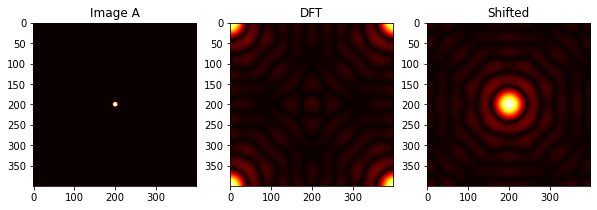

In [2]:
# Drawing the circle image
A = Image.new('1', (400, 400), color=0)
draw = ImageDraw.Draw(A)
c = (200, 200)
r = 5
draw.ellipse((c[0]-r, c[1]-r, c[0]+r, c[1]+r), fill=1)

# Getting the discrete FT
FA = np.fft.fft2(A) 

# Shifting the dft
FAshifted = np.fft.fftshift(FA) 

# Displaying the output

# Creating a figure with three subplots arranged horizontally
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

# Displaying the circle in the first subplot
ax[0].imshow(np.asarray(A), cmap='hot')
ax[0].set_title('Image A')

# Displaying the dft in the second subplot
ax[1].imshow(abs(FA), cmap='hot')
ax[1].set_title('DFT')

# Displaying the shifted dft in the third subplot
ax[2].imshow(abs(FAshifted), cmap='hot')
ax[2].set_title('Shifted')

# Show the figure
plt.show()

First, I drew the circle with radius 5 (Image A), then I applied the fft2 to get the discrete fourier transform of the image created. And since resulting image (DFT) does show intensities at the corners because the diagonal quadrants are interchanged, I shifted it to make it appear zero-centered (Shifted).

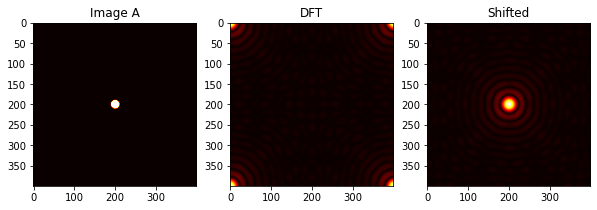

In [3]:
# Trying out with different radius (r=10)

# Drawing the circle image
B = Image.new('1', (400, 400), color=0)
draw = ImageDraw.Draw(B)
c = (200, 200)
r = 10
draw.ellipse((c[0]-r, c[1]-r, c[0]+r, c[1]+r), fill=1)

# Getting the discrete FT
FB = np.fft.fft2(B) 

# Shifting the dft
FBshifted = np.fft.fftshift(FB) 

# Displaying the output

# Creating a figure with three subplots arranged horizontally
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

# Displaying the circle in the first subplot
ax[0].imshow(np.asarray(B), cmap='hot')
ax[0].set_title('Image A')

# Displaying the dft in the second subplot
ax[1].imshow(abs(FB), cmap='hot')
ax[1].set_title('DFT')

# Displaying the shifted dft in the third subplot
ax[2].imshow(abs(FBshifted), cmap='hot')
ax[2].set_title('Shifted')

# Show the figure
plt.show()

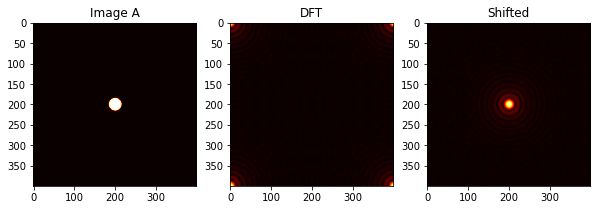

In [4]:
C = Image.new('1', (400, 400), color=0)
draw = ImageDraw.Draw(C)
c = (200, 200)
r = 15
draw.ellipse((c[0]-r, c[1]-r, c[0]+r, c[1]+r), fill=1)

# Getting the discrete FT
FC = np.fft.fft2(C) 

# Shifting the dft
FCshifted = np.fft.fftshift(FC) 

# Displaying the output

# Creating a figure with three subplots arranged horizontally
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

# Displaying the circle in the first subplot
ax[0].imshow(np.asarray(C), cmap='hot')
ax[0].set_title('Image A')

# Displaying the dft in the second subplot
ax[1].imshow(abs(FC), cmap='hot')
ax[1].set_title('DFT')

# Displaying the shifted dft in the third subplot
ax[2].imshow(abs(FCshifted), cmap='hot')
ax[2].set_title('Shifted')

# Show the figure
plt.show()


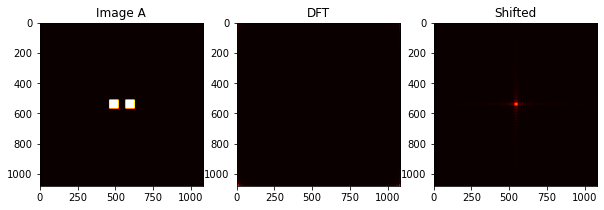

In [119]:
C = Image.open('21.png').convert('L')

# Getting the discrete FT
FC = np.fft.fft2(C) 

# Shifting the dft
FCshifted = np.fft.fftshift(FC) 

# Displaying the output

# Creating a figure with three subplots arranged horizontally
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

# Displaying the circle in the first subplot
ax[0].imshow(np.asarray(C), cmap='hot')
ax[0].set_title('Image A')

# Displaying the dft in the second subplot
ax[1].imshow(abs(FC), cmap='hot')
ax[1].set_title('DFT')

# Displaying the shifted dft in the third subplot
ax[2].imshow(abs(FCshifted), cmap='hot')
ax[2].set_title('Shifted')

# Show the figure
plt.show()

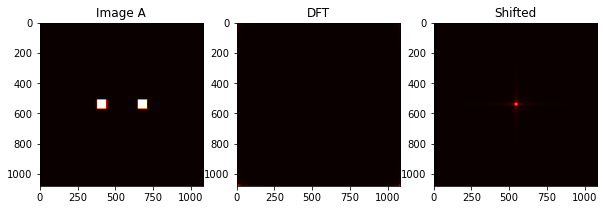

In [116]:
C = Image.open('22.png').convert('L')

# Getting the discrete FT
FC = np.fft.fft2(C) 

# Shifting the dft
FCshifted = np.fft.fftshift(FC) 

# Displaying the output

# Creating a figure with three subplots arranged horizontally
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

# Displaying the circle in the first subplot
ax[0].imshow(np.asarray(C), cmap='hot')
ax[0].set_title('Image A')

# Displaying the dft in the second subplot
ax[1].imshow(abs(FC), cmap='hot')
ax[1].set_title('DFT')

# Displaying the shifted dft in the third subplot
ax[2].imshow(abs(FCshifted), cmap='hot')
ax[2].set_title('Shifted')

# Show the figure
plt.show()

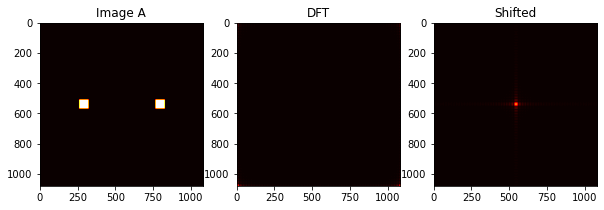

In [120]:
C = Image.open('23.png').convert('L')

# Getting the discrete FT
FC = np.fft.fft2(C) 

# Shifting the dft
FCshifted = np.fft.fftshift(FC) 

# Displaying the output

# Creating a figure with three subplots arranged horizontally
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

# Displaying the circle in the first subplot
ax[0].imshow(np.asarray(C), cmap='hot')
ax[0].set_title('Image A')

# Displaying the dft in the second subplot
ax[1].imshow(abs(FC), cmap='hot')
ax[1].set_title('DFT')

# Displaying the shifted dft in the third subplot
ax[2].imshow(abs(FCshifted), cmap='hot')
ax[2].set_title('Shifted')

# Show the figure
plt.show()

As we can observe, the larger the diameter we set, the lesser the intensities are and smaller the output image becomes.

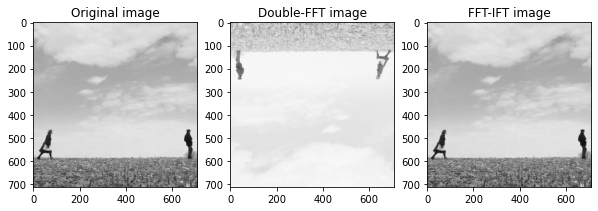

In [117]:
# Trying out the double fft and fft-ift with different images

img1 = Image.open('img3.jpg').convert('L')
img1_array = np.asarray(img1)

# Compute the 2D FFT of the image using fft2
img1_fft = np.fft.fft2(img1_array)

# Apply fft2 again to the FFT
img1_fft_twice = np.fft.fft2(img1_fft)

# Apply fft2 followed by ifft2 to the image
img1_fft_ifft = np.fft.ifft2(img1_fft).real

# Display the original image, the double-FFT image, and the FFT-IFT image
plt.figure(figsize=(10, 4))

plt.subplot(131)
plt.imshow(img1, cmap='gray')
plt.title('Original image')

plt.subplot(132)
plt.imshow(np.log(np.abs(img1_fft_twice)), cmap='gray')
plt.title('Double-FFT image')

plt.subplot(133)
plt.imshow(img1_fft_ifft, cmap='gray')
plt.title('FFT-IFT image')

plt.show()


/var/folders/nd/l3h_t2k14fqdnbr6dbvvblth0000gn/T/ipykernel_1796/4242444158.py:23: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(img1_fft_twice)))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


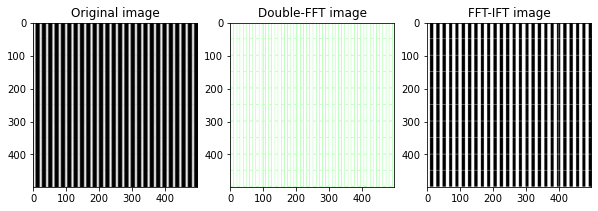

In [98]:
# Trying out the double fft and fft-ift with the images from previous activities

img1 = Image.open('img1.png')
img1_array = np.asarray(img1)

# Compute the 2D FFT of the image using fft2
img1_fft = np.fft.fft2(img1_array)

# Apply fft2 again to the FFT
img1_fft_twice = np.fft.fft2(img1_fft)

# Apply fft2 followed by ifft2 to the image
img1_fft_ifft = np.fft.ifft2(img1_fft).real

# Display the original image, the double-FFT image, and the FFT-IFT image
plt.figure(figsize=(10, 4))

plt.subplot(131)
plt.imshow(img1, cmap='gray')
plt.title('Original image')

plt.subplot(132)
plt.imshow(np.log(np.abs(img1_fft_twice)))
plt.title('Double-FFT image')

plt.subplot(133)
plt.imshow(img1_fft_ifft, cmap='gray')
plt.title('FFT-IFT image')

plt.show()


/var/folders/nd/l3h_t2k14fqdnbr6dbvvblth0000gn/T/ipykernel_1796/2081705340.py:21: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(img2_fft_twice)), cmap='gray')
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


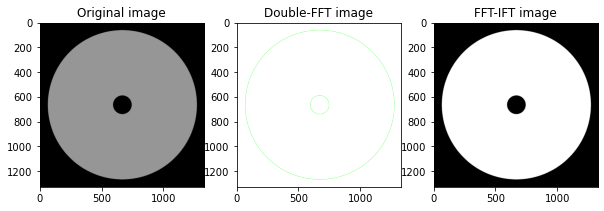

In [111]:
img2 = Image.open('img2.png')
img2_array = np.array(img2)

# Compute the 2D FFT of the image using fft2
img2_fft = np.fft.fft2(img2_array)

# Apply fft2 again to the FFT
img2_fft_twice = np.fft.fft2(img2_fft)

# Apply fft2 followed by ifft2 to the image
img2_fft_ifft = np.fft.ifft2(img2_fft).real

# Display the original image, the double-FFT image, and the FFT-IFT image
plt.figure(figsize=(10, 4))

plt.subplot(131)
plt.imshow(img2, cmap='gray')
plt.title('Original image')

plt.subplot(132)
plt.imshow(np.log(np.abs(img2_fft_twice)), cmap='gray')
plt.title('Double-FFT image')

plt.subplot(133)
plt.imshow(img2_fft_ifft, cmap='gray')
plt.title('FFT-IFT image')

plt.show()

**Activity 2.2. Simulation of an imaging system**

1. Create a 256x256 image of the letters “NIP” in large bold fonts (Arial or Helvetica font recommended) using PAINT or similar apps. Let the letters fill 50% to 75% of the space. Save this image as TIF to preserve the crisp edges. Note the edges of the sans serif font are sharp.
2. Create another 256 x 256 image of a white circle (centered) against a black background. This image represents the “aperture” of a circular lens. Let the diameter of this circle be at 10% of the image width.
3. Convolve the two images using the following steps :
3.1.FFTshift the circular aperture. For a lens, this aperture function is already in the FT space so no need to FFT2 the aperture.
3.2.Take the FFT2 of the NIP image. Do not use abs. We need both real and imaginary parts.
3.3.Multiply the FFT2(NIP) with the fftshifted aperture. 3.4.Inverse FFT2 the product in 3.3 using ifft2(); 3.5.Plot the modulus (abs () ) of the result in 3.4.
4. Repeat steps 2 and 3 for apertures with diameters 25%, 50%, 75% and 100% of the array width. Comment on the appearance of the reconstruction.

**5. Simulate the image of a star produced by the James Webb Space Telescope. Stars may be considered point objects. Simply get the FT of the JWST honeycomb mirror configuration you created in Activity 1. The resulting FT image is how a single star would look like as imaged by JWST.**

Convolving the two images (aperture with 10% of the array width)

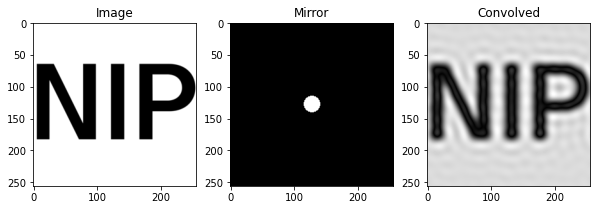

In [61]:
# Opening and converting the image to grayscale
Img = Image.open('2.2.tiff').convert('L') 
Img_array = np.array(Img)

# Creating the aperture
B = Image.new('RGB', (256, 256), color='black')
draw = ImageDraw.Draw(B)

d = 256 * 0.1 # diameter 
c = (256 / 2, 256 / 2) # center
# Draw the circle in white
draw.ellipse((c[0]-d/2, c[1]-d/2, c[0]+d/2, c[1]+d/2), fill='white')
Aper = B.convert('L')
Aper_array = np.array(Aper)

# Convolving the images
G = np.fft.fftshift(Aper_array)
F = np.fft.fft2(Img_array)
H = G*F
h = np.fft.ifft2(H)

# Displaying the output

# Creating a figure with three subplots arranged horizontally
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

# Displaying the circle in the first subplot
ax[0].imshow(Img_array, cmap='gray')
ax[0].set_title('Image')

# Displaying the dft in the second subplot
ax[1].imshow(Aper_array, cmap='gray')
ax[1].set_title('Mirror')

# Displaying the shifted dft in the third subplot
ax[2].imshow(abs(h), cmap='gray')
ax[2].set_title('Convolved')

# Show the figure
plt.show()

Convolving the two images (aperture with 25% of the array width)

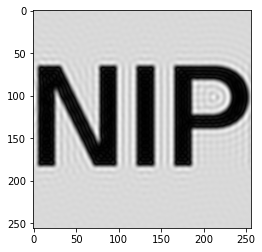

In [10]:
# Creating the aperture with 25%
B25 = Image.new('RGB', (256, 256), color='black')
draw = ImageDraw.Draw(B25)
d = 256 * 0.25 
c = (256 / 2, 256 / 2) 
draw.ellipse((c[0]-d/2, c[1]-d/2, c[0]+d/2, c[1]+d/2), fill='white')
Aper25 = B25.convert('L')
Aper25_array = np.array(Aper25)

# Convolving the images
G25 = np.fft.fftshift(Aper25_array)
F25 = np.fft.fft2(Img_array)
H25 = G25*F25
h25 = np.fft.ifft2(H25)

plt.imshow(abs(h25), cmap="gray")

Convolving the two images (aperture with 50% of the array width)

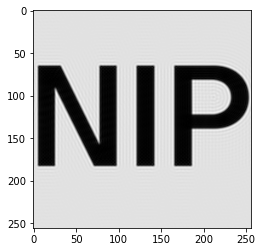

In [11]:
# Creating the aperture with 50%
B50 = Image.new('RGB', (256, 256), color='black')
draw = ImageDraw.Draw(B50)
d = 256 * 0.50 
c = (256 / 2, 256 / 2) 
draw.ellipse((c[0]-d/2, c[1]-d/2, c[0]+d/2, c[1]+d/2), fill='white')
Aper50 = B50.convert('L')
Aper50_array = np.array(Aper50)

# Convolving the images
G50 = np.fft.fftshift(Aper50_array)
F50 = np.fft.fft2(Img_array)
H50 = G50*F50
h50 = np.fft.ifft2(H50)

plt.imshow(abs(h50), cmap="gray")

Convolving the two images (aperture with 75% of the array width)

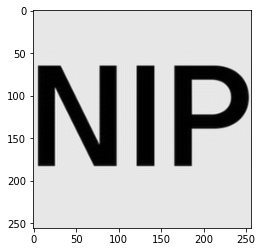

In [12]:
# Creating the aperture with 75%
B75 = Image.new('RGB', (256, 256), color='black')
draw = ImageDraw.Draw(B75)
d = 256 * 0.75 
c = (256 / 2, 256 / 2) 
draw.ellipse((c[0]-d/2, c[1]-d/2, c[0]+d/2, c[1]+d/2), fill='white')
Aper75 = B75.convert('L')
Aper75_array = np.array(Aper75)

# Convolving the images
G75 = np.fft.fftshift(Aper75_array)
F75 = np.fft.fft2(Img_array)
H75 = G75*F75
h75 = np.fft.ifft2(H75)

plt.imshow(abs(h75), cmap="gray")

Convolving the two images (aperture with 100% of the array width)

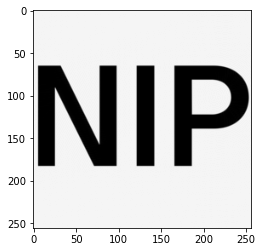

In [13]:
# Creating the aperture with 75%
B100 = Image.new('RGB', (256, 256), color='black')
draw = ImageDraw.Draw(B100)
d = 256 * 1.0
c = (256 / 2, 256 / 2) 
draw.ellipse((c[0]-d/2, c[1]-d/2, c[0]+d/2, c[1]+d/2), fill='white')
Aper100 = B100.convert('L')
Aper100_array = np.array(Aper100)

# Convolving the images
G100 = np.fft.fftshift(Aper100_array)
F100 = np.fft.fft2(Img_array)
H100 = G100*F100
h100 = np.fft.ifft2(H100)

plt.imshow(abs(h100), cmap="gray")

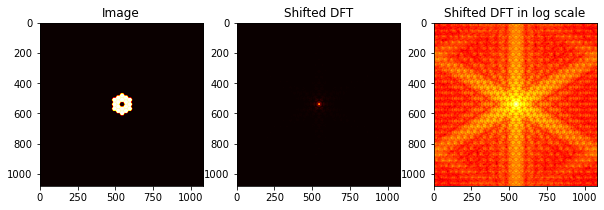

In [75]:
# Loading honeycomb image and converting to grayscale
img = Image.open('jwst.png').convert('L')
arr = np.array(img)

# Calculating Fourier transform and shifting zero-frequency component to center
arr_fft = np.fft.fft2(arr)
arr_fft_shifted = np.fft.fftshift(abs(arr_fft))

# Displaying the output

# Creating a figure with three subplots arranged horizontally
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

# Displaying the circle in the first subplot
ax[0].imshow(arr, cmap='hot')
ax[0].set_title('Image')

# Displaying the dft in the second subplot
ax[1].imshow(arr_fft_shifted, cmap='hot')
ax[1].set_title('Shifted DFT')

# Displaying the dft in the second subplot
ax[2].imshow(np.log(arr_fft_shifted), cmap='hot')
ax[2].set_title('Shifted DFT in log scale')

plt.show()

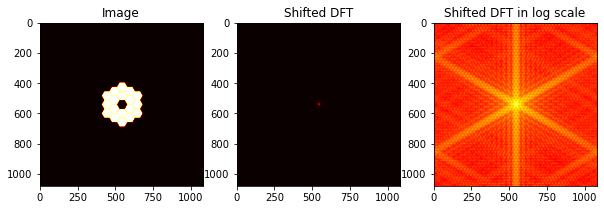

In [99]:
# Loading honeycomb image and converting to grayscale
img = Image.open('jwst3.png').convert('L')
arr = np.array(img)

# Calculating Fourier transform and shifting zero-frequency component to center
arr_fft = np.fft.fft2(arr)
arr_fft_shifted = np.fft.fftshift(abs(arr_fft))

# Displaying the output

# Creating a figure with three subplots arranged horizontally
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

# Displaying the circle in the first subplot
ax[0].imshow(arr, cmap='hot')
ax[0].set_title('Image')

# Displaying the dft in the second subplot
ax[1].imshow(arr_fft_shifted, cmap='hot')
ax[1].set_title('Shifted DFT')

# Displaying the dft in the second subplot
ax[2].imshow(np.log(arr_fft_shifted), cmap='hot')
ax[2].set_title('Shifted DFT in log scale')

plt.show()

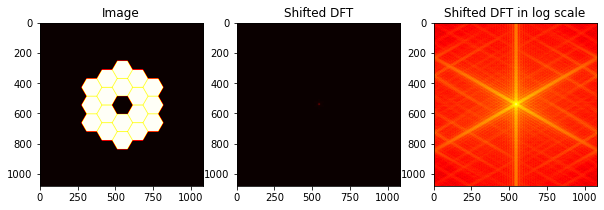

In [100]:
# Loading honeycomb image and converting to grayscale
img = Image.open('jwst2.png').convert('L')
arr = np.array(img)

# Calculating Fourier transform and shifting zero-frequency component to center
arr_fft = np.fft.fft2(arr)
arr_fft_shifted = np.fft.fftshift(abs(arr_fft))

# Displaying the output

# Creating a figure with three subplots arranged horizontally
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

# Displaying the circle in the first subplot
ax[0].imshow(arr, cmap='hot')
ax[0].set_title('Image')

# Displaying the dft in the second subplot
ax[1].imshow(arr_fft_shifted, cmap='hot')
ax[1].set_title('Shifted DFT')

# Displaying the dft in the second subplot
ax[2].imshow(np.log(arr_fft_shifted), cmap='hot')
ax[2].set_title('Shifted DFT in log scale')

plt.show()

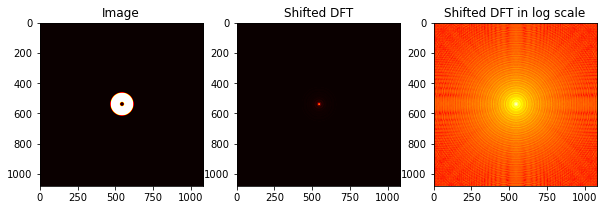

In [105]:
# Loading honeycomb image and converting to grayscale
img = Image.open('hubble1.png').convert('L')
arr = np.array(img)

# Calculating Fourier transform and shifting zero-frequency component to center
arr_fft = np.fft.fft2(arr)
arr_fft_shifted = np.fft.fftshift(abs(arr_fft))

# Displaying the output

# Creating a figure with three subplots arranged horizontally
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

# Displaying the circle in the first subplot
ax[0].imshow(arr, cmap='hot')
ax[0].set_title('Image')

# Displaying the dft in the second subplot
ax[1].imshow(arr_fft_shifted, cmap='hot')
ax[1].set_title('Shifted DFT')

# Displaying the dft in the second subplot
ax[2].imshow(np.log(arr_fft_shifted), cmap='hot')
ax[2].set_title('Shifted DFT in log scale')

plt.show()

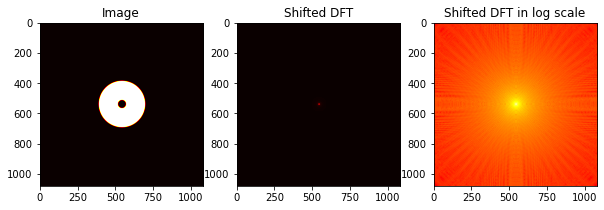

In [107]:
# Loading honeycomb image and converting to grayscale
img = Image.open('hubble2.png').convert('L')
arr = np.array(img)

# Calculating Fourier transform and shifting zero-frequency component to center
arr_fft = np.fft.fft2(arr)
arr_fft_shifted = np.fft.fftshift(abs(arr_fft))

# Displaying the output

# Creating a figure with three subplots arranged horizontally
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

# Displaying the circle in the first subplot
ax[0].imshow(arr, cmap='hot')
ax[0].set_title('Image')

# Displaying the dft in the second subplot
ax[1].imshow(arr_fft_shifted, cmap='hot')
ax[1].set_title('Shifted DFT')

# Displaying the dft in the second subplot
ax[2].imshow(np.log(arr_fft_shifted), cmap='hot')
ax[2].set_title('Shifted DFT in log scale')

plt.show()

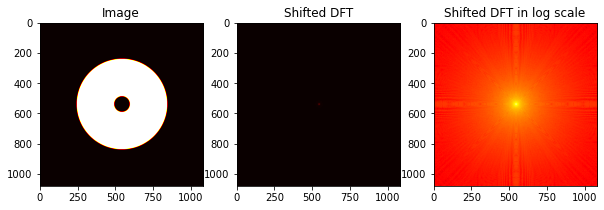

In [106]:
# Loading honeycomb image and converting to grayscale
img = Image.open('hubble3.png').convert('L')
arr = np.array(img)

# Calculating Fourier transform and shifting zero-frequency component to center
arr_fft = np.fft.fft2(arr)
arr_fft_shifted = np.fft.fftshift(abs(arr_fft))

# Displaying the output

# Creating a figure with three subplots arranged horizontally
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

# Displaying the circle in the first subplot
ax[0].imshow(arr, cmap='hot')
ax[0].set_title('Image')

# Displaying the dft in the second subplot
ax[1].imshow(arr_fft_shifted, cmap='hot')
ax[1].set_title('Shifted DFT')

# Displaying the dft in the second subplot
ax[2].imshow(np.log(arr_fft_shifted), cmap='hot')
ax[2].set_title('Shifted DFT in log scale')

plt.show()

Additional: I am curious to see what would happen if I convolve the the JWST mirror with a sky image.

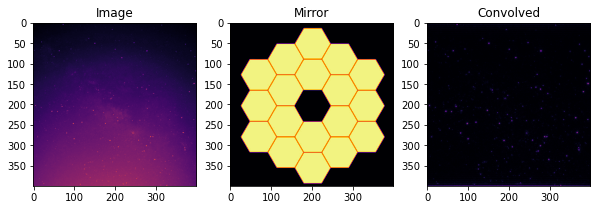

In [16]:
# Opening and converting the sky image to grayscale
Img = Image.open('sky.jpg').convert('L') 
Img_array = np.array(Img.resize((400,400)))

# Opening and converting the mirror image to grayscale
Aper = Image.open('jwst1.png').convert('L')
Aper_array = np.array(Aper.resize((400,400)))
Aper

# Convoling the images
G = np.fft.fftshift(Aper_array)
F = np.fft.fft2(Img_array)
H = G*F
h = np.fft.ifft2(H)

# Displaying the output

# Creating a figure with three subplots arranged horizontally
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

# Displaying the circle in the first subplot
ax[0].imshow(Img_array, cmap='inferno')
ax[0].set_title('Image')

# Displaying the dft in the second subplot
ax[1].imshow(Aper_array, cmap='inferno')
ax[1].set_title('Mirror')

# Displaying the shifted dft in the third subplot
ax[2].imshow(abs(h), cmap='inferno')
ax[2].set_title('Convolved')

# Show the figure
plt.show()


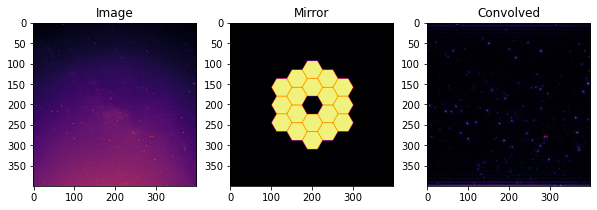

In [17]:
# Opening and converting the sky image to grayscale
Img = Image.open('sky.jpg').convert('L') 
Img_array = np.array(Img.resize((400,400)))

# Opening and converting the mirror image to grayscale
Aper = Image.open('jwst2.png').convert('L')
Aper_array = np.array(Aper.resize((400,400)))
Aper

# Convoling the images
G = np.fft.fftshift(Aper_array)
F = np.fft.fft2(Img_array)
H = G*F
h = np.fft.ifft2(H)

# Displaying the output

# Creating a figure with three subplots arranged horizontally
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

# Displaying the circle in the first subplot
ax[0].imshow(Img_array, cmap='inferno')
ax[0].set_title('Image')

# Displaying the dft in the second subplot
ax[1].imshow(Aper_array, cmap='inferno')
ax[1].set_title('Mirror')

# Displaying the shifted dft in the third subplot
ax[2].imshow(abs(h), cmap='inferno')
ax[2].set_title('Convolved')

# Show the figure
plt.show()


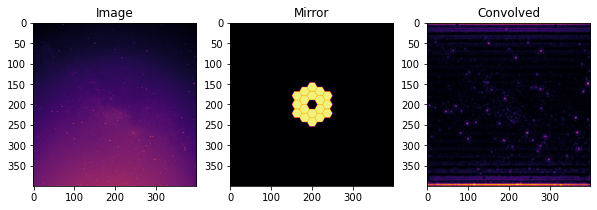

In [18]:
# Opening and converting the sky image to grayscale
Img = Image.open('sky.jpg').convert('L') 
Img_array = np.array(Img.resize((400,400)))

# Opening and converting the mirror image to grayscale
Aper = Image.open('jwst3.png').convert('L')
Aper_array = np.array(Aper.resize((400,400)))
Aper

# Convoling the images
G = np.fft.fftshift(Aper_array)
F = np.fft.fft2(Img_array)
H = G*F
h = np.fft.ifft2(H)

# Displaying the output

# Creating a figure with three subplots arranged horizontally
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

# Displaying the circle in the first subplot
ax[0].imshow(Img_array, cmap='inferno')
ax[0].set_title('Image')

# Displaying the dft in the second subplot
ax[1].imshow(Aper_array, cmap='inferno')
ax[1].set_title('Mirror')

# Displaying the shifted dft in the third subplot
ax[2].imshow(abs(h), cmap='inferno')
ax[2].set_title('Convolved')

# Show the figure
plt.show()


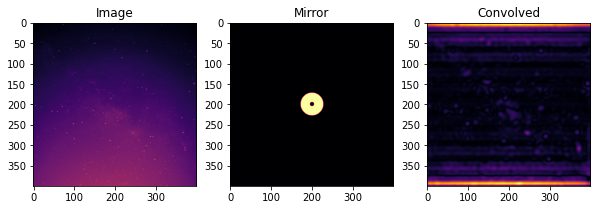

In [101]:
# Opening and converting the sky image to grayscale
Img = Image.open('sky.jpg').convert('L') 
Img_array = np.array(Img.resize((400,400)))

# Opening and converting the mirror image to grayscale
Aper = Image.open('hubble.png').convert('L')
Aper_array = np.array(Aper.resize((400,400)))
Aper

# Convoling the images
G = np.fft.fftshift(Aper_array)
F = np.fft.fft2(Img_array)
H = G*F
h = np.fft.ifft2(H)

# Displaying the output

# Creating a figure with three subplots arranged horizontally
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

# Displaying the circle in the first subplot
ax[0].imshow(Img_array, cmap='inferno')
ax[0].set_title('Image')

# Displaying the dft in the second subplot
ax[1].imshow(Aper_array, cmap='inferno')
ax[1].set_title('Mirror')

# Displaying the shifted dft in the third subplot
ax[2].imshow(abs(h), cmap='inferno')
ax[2].set_title('Convolved')

# Show the figure
plt.show()


**Activity 2.3. Template matching using correlation**

1. Create a 256x 256 image in PAINT with the phrase “THE RAIN IN SPAIN STAYS MAINLY IN THE PLAIN”. All caps please and use sans serif fonts such as Arial or Helvetica. Let the letters be white and the background black.
2. Create a 256x256 image in PAINT of the letter “A” using the same font and font size as in step 1. Make sure “A” is in the geometric center of the image. Again, letter is white, background black. A is the “template” and we want to find matches of “A” in the target phrase image.
3. Get the FFT2 of both images.
4. Multiply the complex conjugate of FFT2(A) with the FFT2 of the phrase image.
5. Get the inverse FFT of the result in 4 and display as abs(). Comment on the result.
6. Repeat for the letter “I”. Comment on the difference between the results of using “I” and “A”.

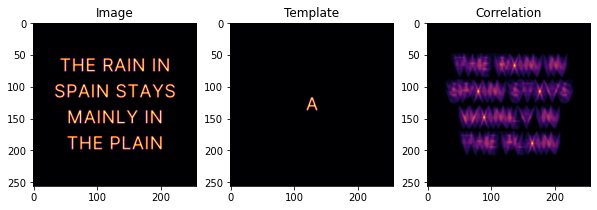

In [19]:
# Loading and converting the phrase image
phrase0 = Image.open('phrase.png').convert('L') # converting the imager to grayscale
phrase = phrase0.resize((256,256)) # bec it was saved as 1080 x 1080
phrase_array = np.array(phrase)
phrase

# Loading and converting the letter a image
letterA0 = Image.open('letterA.png').convert('L') # converting the imager to grayscale
letterA = letterA0.resize((256,256))
letterA_array = np.array(letterA)
letterA

# Matching
Fphrase = np.fft.fft2(phrase_array)
FletterA = np.fft.fft2(letterA_array)
P = np.conj(FletterA)*Fphrase #FImg is complex FFT2 of the phrase image #Again just use one channel
smallp = np.fft.ifft2(P) 
corr = np.fft.fftshift(abs(smallp))

# Displaying the output

# Creating a figure with three subplots arranged horizontally
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

# Displaying the circle in the first subplot
ax[0].imshow(phrase, cmap='inferno')
ax[0].set_title('Image')

# Displaying the dft in the second subplot
ax[1].imshow(letterA, cmap='inferno')
ax[1].set_title('Template')

# Displaying the shifted dft in the third subplot
ax[2].imshow(corr, cmap='inferno')
ax[2].set_title('Correlation')

# Show the figure
plt.show()

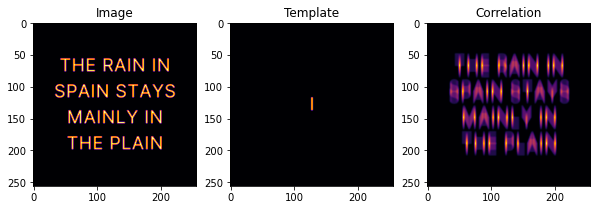

In [20]:
# Loading and converting the phrase image
phrase0 = Image.open('phrase.png').convert('L') # converting the imager to grayscale
phrase = phrase0.resize((256,256)) # bec it was saved as 1080 x 1080
phrase_array = np.array(phrase)

# Loading and converting the letter a image
letterI0 = Image.open('letterI.png').convert('L') # converting the imager to grayscale
letterI = letterI0.resize((256,256))
letterI_array = np.array(letterI)

# Matching
Fphrase = np.fft.fft2(phrase_array)
FletterI = np.fft.fft2(letterI_array)
P = np.conj(FletterI)*Fphrase #FImg is complex FFT2 of the phrase image #Again just use one channel
smallp = np.fft.ifft2(P) 
corr = np.fft.fftshift(abs(smallp))

# Displaying the output

# Creating a figure with three subplots arranged horizontally
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

# Displaying the circle in the first subplot
ax[0].imshow(phrase, cmap='inferno')
ax[0].set_title('Image')

# Displaying the dft in the second subplot
ax[1].imshow(letterI, cmap='inferno')
ax[1].set_title('Template')

# Displaying the shifted dft in the third subplot
ax[2].imshow(corr, cmap='inferno')
ax[2].set_title('Correlation')

# Show the figure
plt.show()

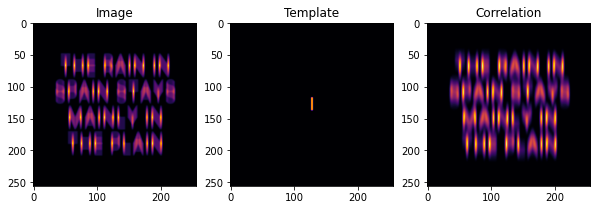

In [22]:
corr_array = np.fft.fftshift(abs(smallp))

# Loading and converting the letter a image
letterI0 = Image.open('letterI.png').convert('L') # converting the imager to grayscale
letterI = letterI0.resize((256,256))
letterI_array = np.array(letterI)

# Matching
Fcorr = np.fft.fft2(corr_array)
FletterI = np.fft.fft2(letterI_array)
P = np.conj(FletterI)*Fcorr #FImg is complex FFT2 of the phrase image #Again just use one channel
smallp = np.fft.ifft2(P) 
corr1 = np.fft.fftshift(abs(smallp))


# Creating a figure with three subplots arranged horizontally
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

# Displaying the circle in the first subplot
ax[0].imshow(corr, cmap='inferno')
ax[0].set_title('Image')

# Displaying the dft in the second subplot
ax[1].imshow(letterI, cmap='inferno')
ax[1].set_title('Template')

# Displaying the shifted dft in the third subplot
ax[2].imshow(corr1, cmap='inferno')
ax[2].set_title('Correlation')

# Show the figure
plt.show()

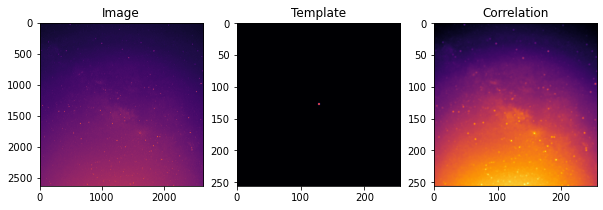

In [23]:
# Loading and converting the sky image
image = Image.open('sky.jpg').convert('L') # converting the imager to grayscale
image1 = image.resize((256,256)) # bec it was saved as 1080 x 1080
image_array = np.array(image1)

# Loading and converting the circle image
circ = Image.open('dot.png').convert('L') # converting the imager to grayscale
circle = circ.resize((256,256))
circle_array = np.array(circle)

# Matching
Fimage = np.fft.fft2(image_array)
Fcircle = np.fft.fft2(circle_array)
P = np.conj(Fcircle)*Fimage #FImg is complex FFT2 of the phrase image #Again just use one channel
smallp = np.fft.ifft2(P) 
corr = np.fft.fftshift(abs(smallp))

# Displaying the output

# Creating a figure with three subplots arranged horizontally
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

# Displaying the circle in the first subplot
ax[0].imshow(image, cmap='inferno')
ax[0].set_title('Image')

# Displaying the dft in the second subplot
ax[1].imshow(circle, cmap='inferno')
ax[1].set_title('Template')

# Displaying the shifted dft in the third subplot
ax[2].imshow(corr, cmap='inferno')
ax[2].set_title('Correlation')

# Show the figure
plt.show()

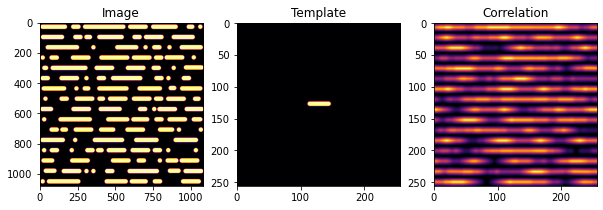

In [24]:
# Loading and converting the sky image
image = Image.open('pattern.png').convert('L') # converting the imager to grayscale
image1 = image.resize((256,256)) # bec it was saved as 1080 x 1080
image_array = np.array(image1)

# Loading and converting the circle image
circ = Image.open('pattern_template.png').convert('L') # converting the imager to grayscale
circle = circ.resize((256,256))
circle_array = np.array(circle)

# Matching
Fimage = np.fft.fft2(image_array)
Fcircle = np.fft.fft2(circle_array)
P = np.conj(Fcircle)*Fimage #FImg is complex FFT2 of the phrase image #Again just use one channel
smallp = np.fft.ifft2(P) 
corr = np.fft.fftshift(abs(smallp))

# Displaying the output

# Creating a figure with three subplots arranged horizontally
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

# Displaying the circle in the first subplot
ax[0].imshow(image, cmap='inferno')
ax[0].set_title('Image')

# Displaying the dft in the second subplot
ax[1].imshow(circle, cmap='inferno')
ax[1].set_title('Template')

# Displaying the shifted dft in the third subplot
ax[2].imshow(corr, cmap='inferno')
ax[2].set_title('Correlation')

# Show the figure
plt.show()